In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
diamonds = pd.read_csv('../Data/diamonds_hist.csv')

In [53]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


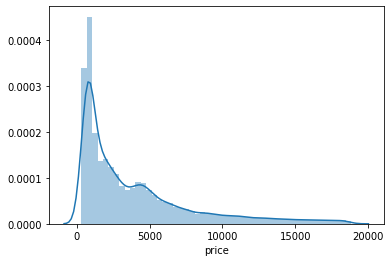

In [54]:
sns.distplot(diamonds.price)

In [55]:
diamonds['clarity'].unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [56]:
clarity_scale = {
                'IF' : 10, 'VVS1' : 9, 
                'VVS2' : 8, 'VS1' : 7, 
                'VS2' : 6, 'SI1' : 5, 
                'SI2' : 4, 'I1' : 3, 
                'I2' : 2, 'I1' : 1
                }

In [57]:
diamonds['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [58]:
cut_scale = {
            'Premium' : 5, 
            'Good' : 4, 
            'Very Good' : 3, 
            'Ideal' : 2, 
            'Fair' :1
            }

In [59]:
diamonds['clarity_scale'] = diamonds['clarity'].map(clarity_scale)
diamonds['cut_scale'] = diamonds['cut'].map(cut_scale)

In [60]:
diamonds.corr()

,carat,depth,table,price,x,y,z,clarity_scale,cut_scale
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824,-0.356513,0.127395
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344,-0.076087,-0.172125
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646,-0.160457,0.450405
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247,-0.143024,0.099009
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336,-0.373010,0.136280
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768,-0.357968,0.122943
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000,-0.368098,0.104568
clarity_scale,-0.356513,-0.076087,-0.160457,-0.143024,-0.373010,-0.357968,-0.368098,1.000000,-0.137107
cut_scale,0.127395,-0.172125,0.450405,0.099009,0.136280,0.122943,0.104568,-0.137107,1.000000


In [61]:
diamonds['carat'].describe()

count    48940.000000
mean         0.797817
std          0.474126
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

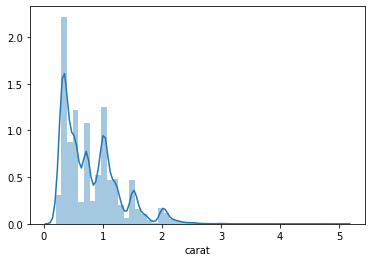

In [62]:
sns.distplot(diamonds.carat)

In [63]:
carat_range = diamonds['carat'].describe()

In [64]:
diamonds['carat'].describe()

count    48940.000000
mean         0.797817
std          0.474126
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [65]:
def caratrange(x):
    
    if x >= carat_range['min'] and x < carat_range['25%']:
        return 'bucket_1'
    elif x >= carat_range['25%'] and x < carat_range['50%']:
        return 'bucket_2'
    elif x >= carat_range['50%'] and x < carat_range['75%']:
        return 'bucket_3'
    elif x >= carat_range['75%']:
        return 'bucket_4'
    else:
        return 'undefined'

In [66]:
diamonds['carat_range'] = diamonds['carat'].apply(caratrange)

In [67]:
diamonds['carat_range'].unique()

array(['bucket_1', 'bucket_2', 'bucket_3', 'bucket_4'], dtype=object)

In [68]:
price_estimate = diamonds.groupby(by='carat_range')['price'].agg(price_predicted = 'mean').reset_index()

In [69]:
price_estimate.head()

,carat_range,price_predicted
0,bucket_1,720.591972
1,bucket_2,1452.418615
2,bucket_3,3917.407493
3,bucket_4,9155.050219


In [70]:
rick_diamonds = pd.read_csv('../Data/rick_diamonds.csv')

In [71]:
rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [72]:
rick_diamonds['carat_range'] = rick_diamonds['carat'].apply(caratrange)

In [73]:
diamond_ballpark = pd.merge(rick_diamonds, price_estimate, on='carat_range', how='outer')

In [74]:
diamond_ballpark.head()

,carat,cut,color,clarity,depth,table,x,y,z,carat_range,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,bucket_3,3917.407493
1,0.70,Premium,E,SI1,60.1,58.0,5.81,5.83,3.50,bucket_3,3917.407493
2,0.73,Premium,I,VS2,59.7,59.0,5.94,5.81,3.51,bucket_3,3917.407493
3,0.73,Ideal,H,IF,61.6,55.0,5.80,5.82,3.58,bucket_3,3917.407493
4,1.00,Good,D,VS2,64.1,58.0,6.24,6.33,4.03,bucket_3,3917.407493


In [76]:
diamond_ballpark.to_csv('../Analysis/diamond_ballpark.csv')